**# AML HW 2 Q2**

Dataset: https://archive.ics.uci.edu/dataset/563/iranian+churn+dataset

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

## 1. Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?

In [232]:
df = pd.read_csv('Customer Churn.csv', delimiter=',')
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [233]:
df.shape

(3150, 14)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

In [235]:
df.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [236]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [237]:
continuous_features = [feature for feature in df.columns if df[feature].dtype != object]

The dataset consists of 14 attributes with 3150 entries. 
Based on the histograms and statistical values:
* **Right-Skewed Features** (e.g., Call Failure, Seconds of Use, Frequency features):
These features might benefit from transformations such as log transformation or normalization to reduce skewness and make them more normally distributed.
* **Sparse Features** (e.g., Charge Amount):
Since many values are concentrated at zero, I may want to handle sparsity by imputing missing values or using binning techniques.
* **Wide Range Features** (e.g., Customer Value):
Features with large ranges may need scaling (e.g., Min-Max Scaling or Standardization) before being used to ensure they don't dominate other features during training.

## 2. Analyze and discuss the relationships between the data attributes and between the data attributes and labels. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.

<Figure size 1500x1000 with 0 Axes>

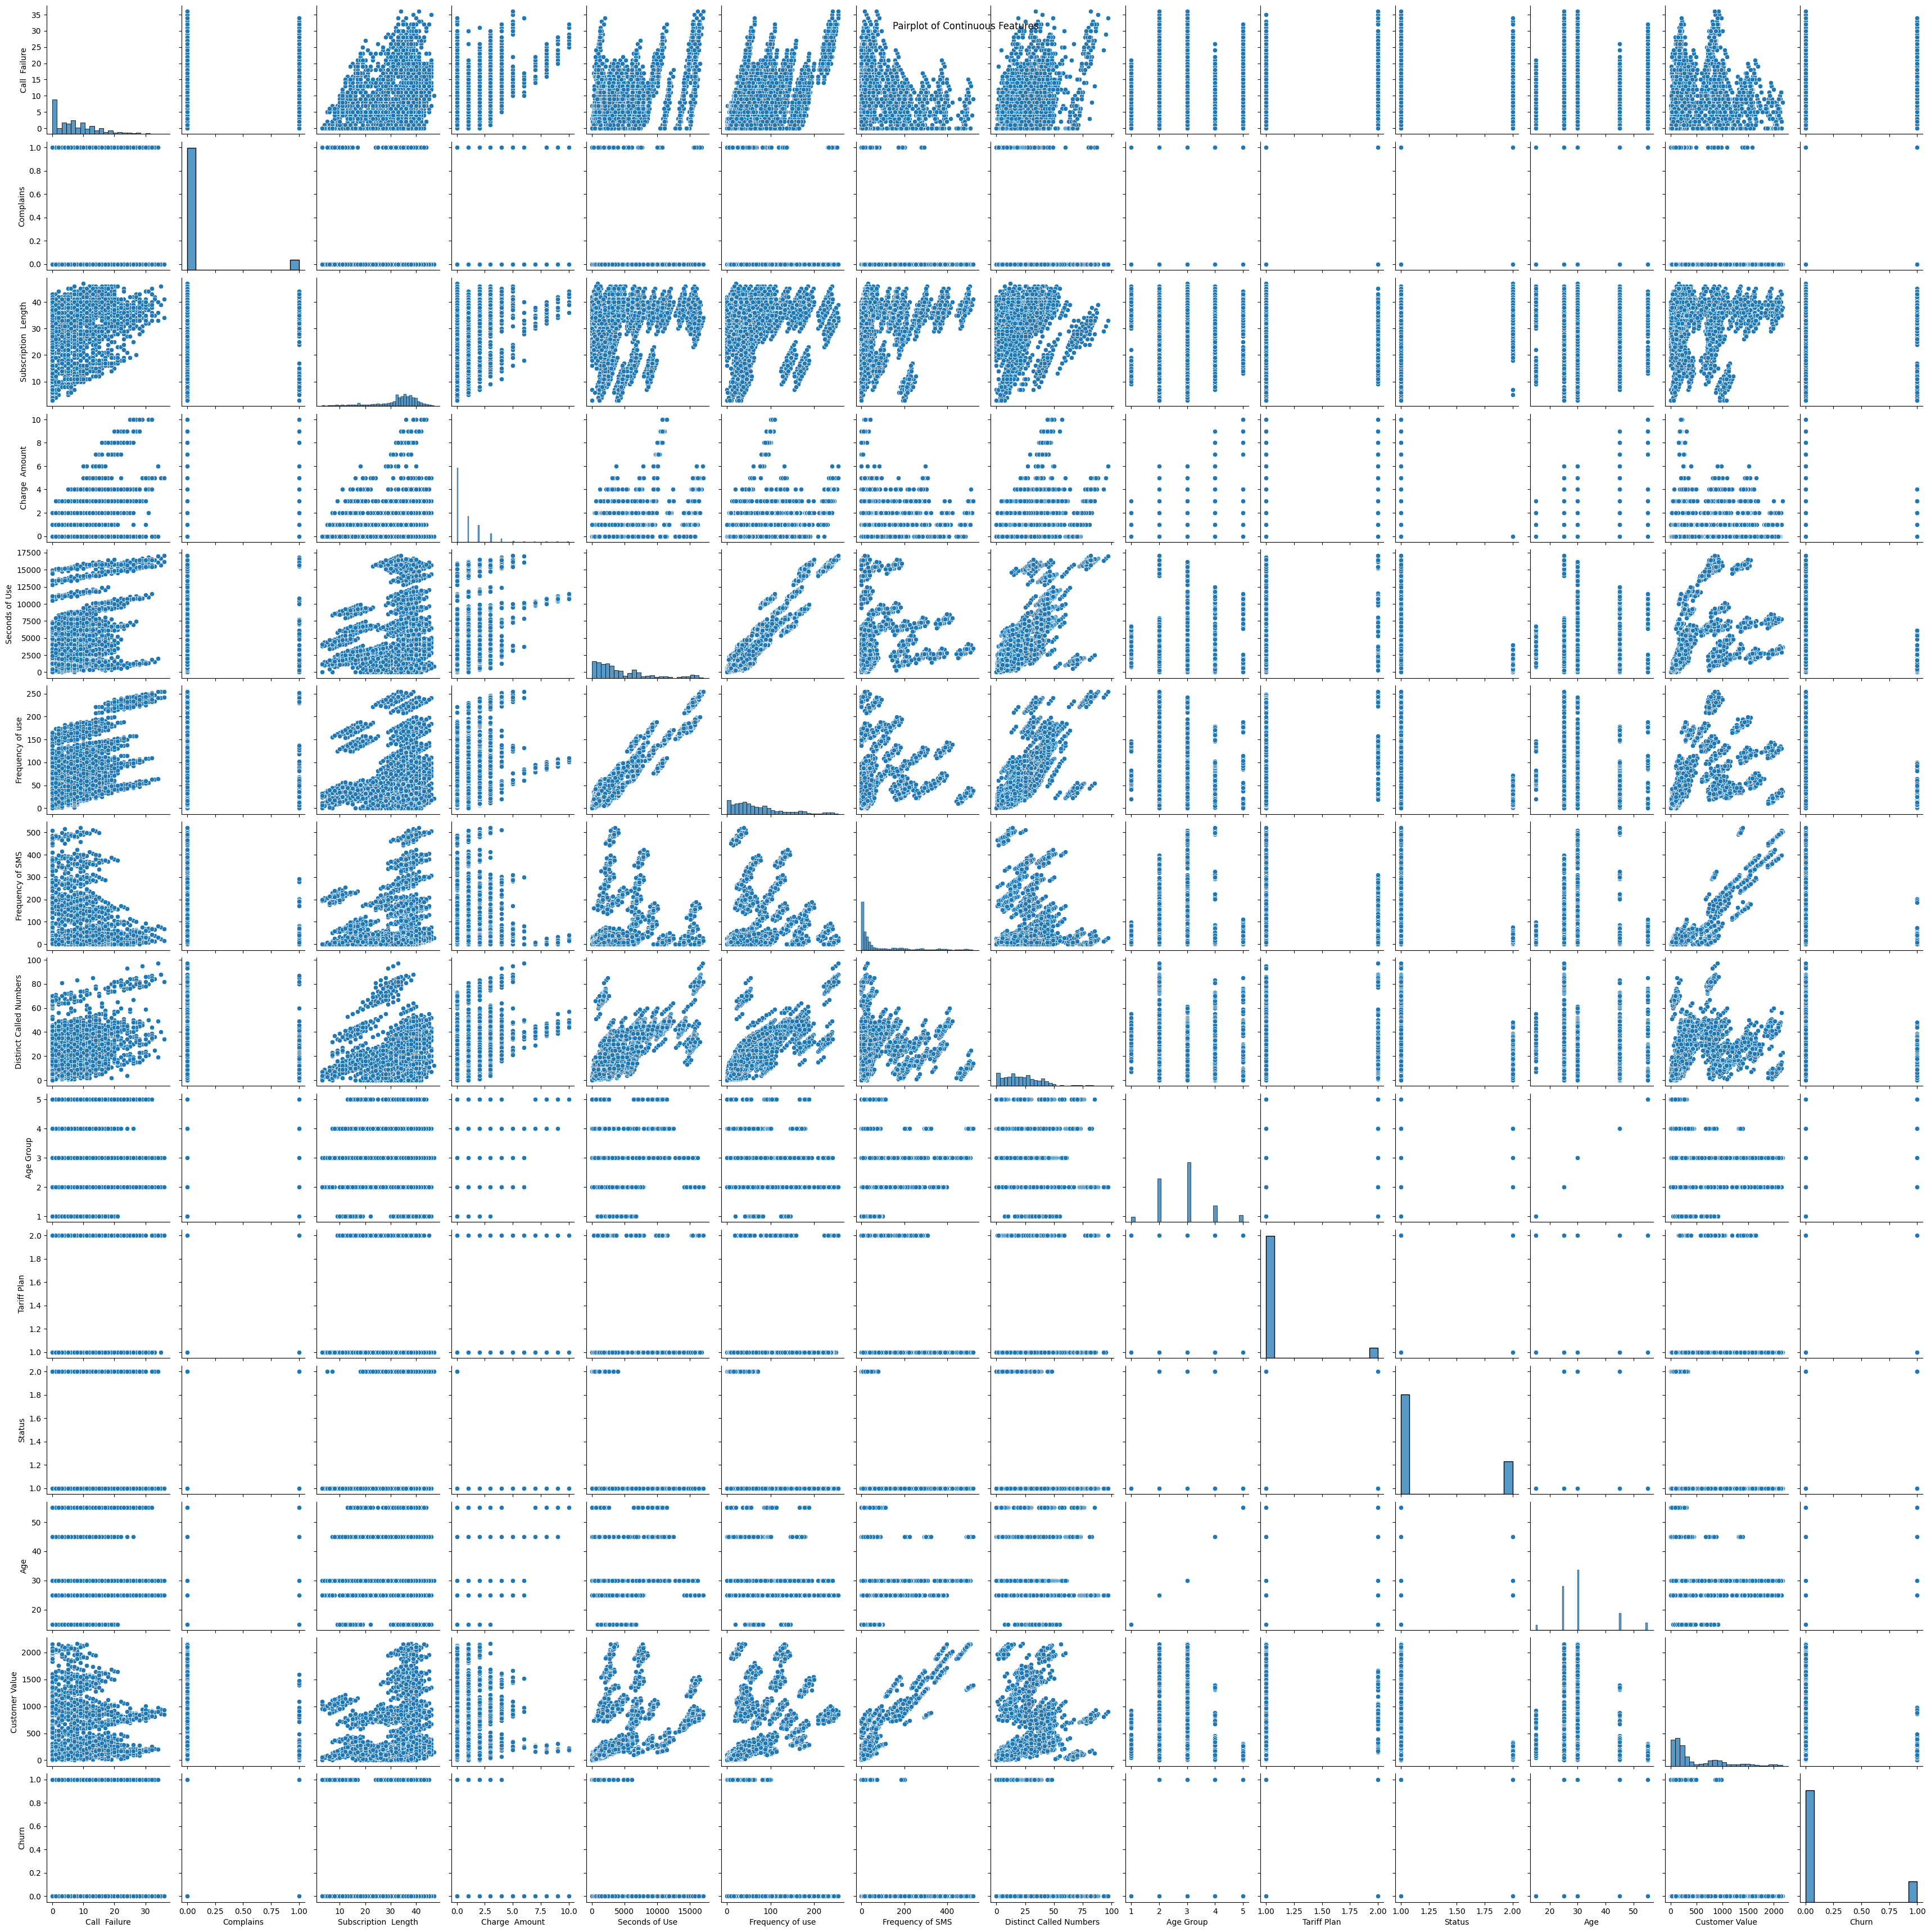

In [219]:
plt.figure(figsize=(15,10))
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.suptitle('Pairplot of Continuous Features')
plt.show()

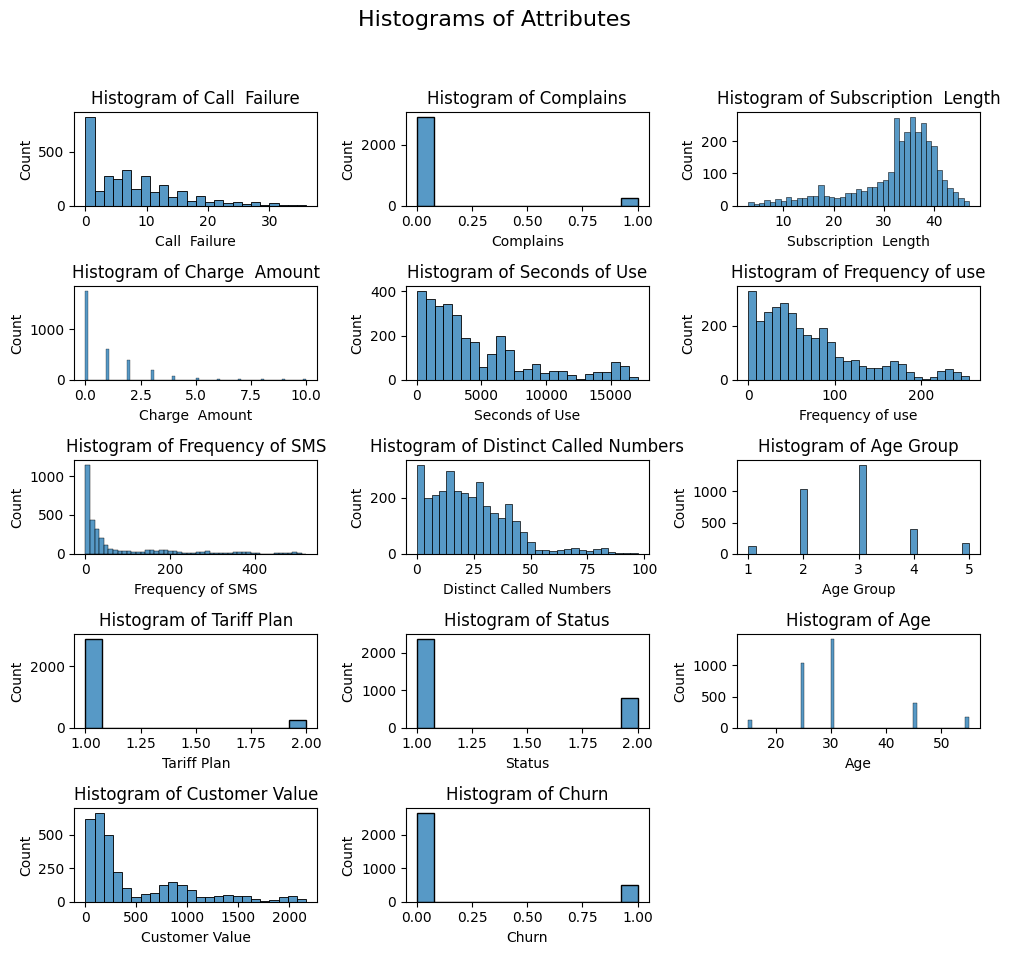

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the total number of attributes
num_attributes = len(df.columns)

# Calculate the number of rows needed for a 3-column layout
num_rows = (num_attributes + 2) // 3  # Round up to fit all attributes

# Create subplots with the calculated number of rows and 3 columns
figure, axis = plt.subplots(num_rows, 3, figsize=(10, 10))
figure.suptitle("Histograms of Attributes", fontsize=16)

# Flatten the axis array for easier indexing if there is more than one row
axis = axis.flatten()

# Plot each attribute in a separate subplot
for idx, column_name in enumerate(df.columns):
    sns.histplot(df[column_name], ax=axis[idx])
    axis[idx].set_title(f'Histogram of {column_name}')

# Hide any remaining empty subplots
for j in range(idx + 1, len(axis)):
    axis[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [221]:
def boxplot_grid(data, columns):
    num_columns = 4
    num_rows = len(columns) // num_columns + (len(columns) % num_columns > 0)


    fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 4))


    axes = axes.flatten()


    for i, column in enumerate(columns):
        sns.boxplot(data=data, x=column, ax=axes[i])
        axes[i].set_title(f'Boxplot of {column}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])


    plt.tight_layout()
    plt.show()

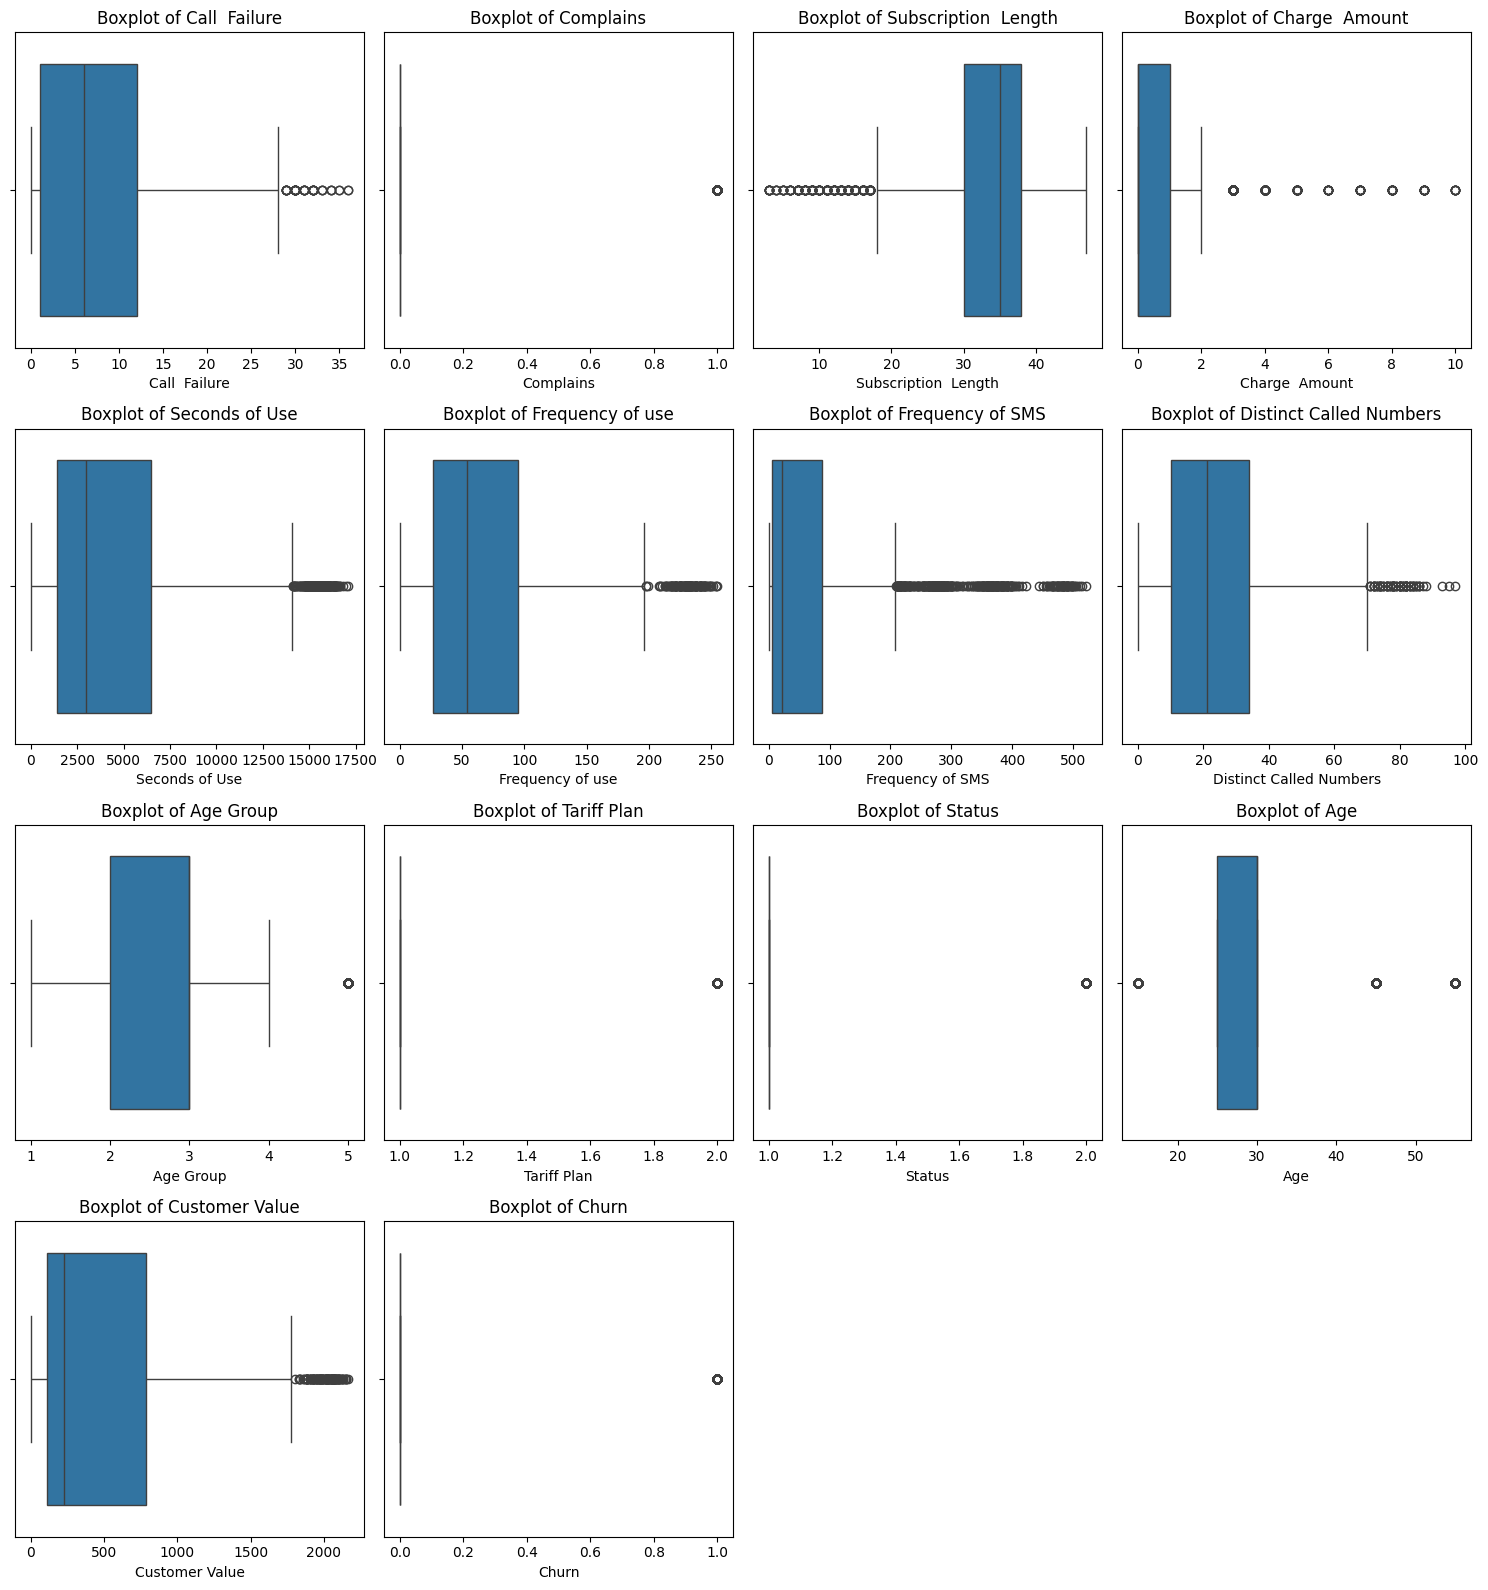

In [222]:
boxplot_lambda = lambda data, columns: boxplot_grid(data, columns)
boxplot_lambda(df, continuous_features)

In [223]:
def find_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)


    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    return outliers


continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns


outliers_dict = {}

for column in continuous_columns:
    outliers = find_outliers_iqr(df, column)
    if not outliers.empty:
        outliers_dict[column] = outliers


for col, outliers in outliers_dict.items():
    print(f"Outliers in '{col}':")
    print(outliers)
    print()


Outliers in 'Call  Failure':
262     30
283     30
462     29
483     29
862     31
872     29
883     31
2112    30
2133    30
2162    33
2172    31
2173    29
2183    33
2262    31
2272    29
2283    31
2312    29
2333    29
2362    35
2372    33
2373    31
2383    35
2462    32
2472    30
2483    32
2562    34
2572    32
2573    30
2583    34
2662    30
2683    30
2712    30
2733    30
2762    32
2772    30
2783    32
2912    32
2922    30
2933    32
2962    36
2972    34
2973    32
2983    36
3062    30
3083    30
3112    30
3133    30
Name: Call  Failure, dtype: int64

Outliers in 'Complains':
22      1
23      1
24      1
27      1
31      1
       ..
3122    1
3126    1
3127    1
3131    1
3149    1
Name: Complains, Length: 241, dtype: int64

Outliers in 'Subscription  Length':
45      17
46      15
47      16
48       9
49       9
        ..
3098    11
3099    11
3146    17
3148    11
3149    11
Name: Subscription  Length, Length: 282, dtype: int64

Outliers in 'Charge  Amount'

In [224]:
X = df.drop(['Churn'],axis=1)
y = df['Churn']

In [225]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3145    0
3146    0
3147    0
3148    0
3149    1
Name: Churn, Length: 3150, dtype: int64

In [226]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
dtypes: float64(1), int64(12)
memory usage: 320.0 KB


In [227]:
pt = PowerTransformer(method='yeo-johnson')
X_transformed = pt.fit_transform(X)

In [228]:
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

In [229]:
continuous_features_new = [feature for feature in X_transformed_df.columns if X_transformed_df[feature].dtype != object]

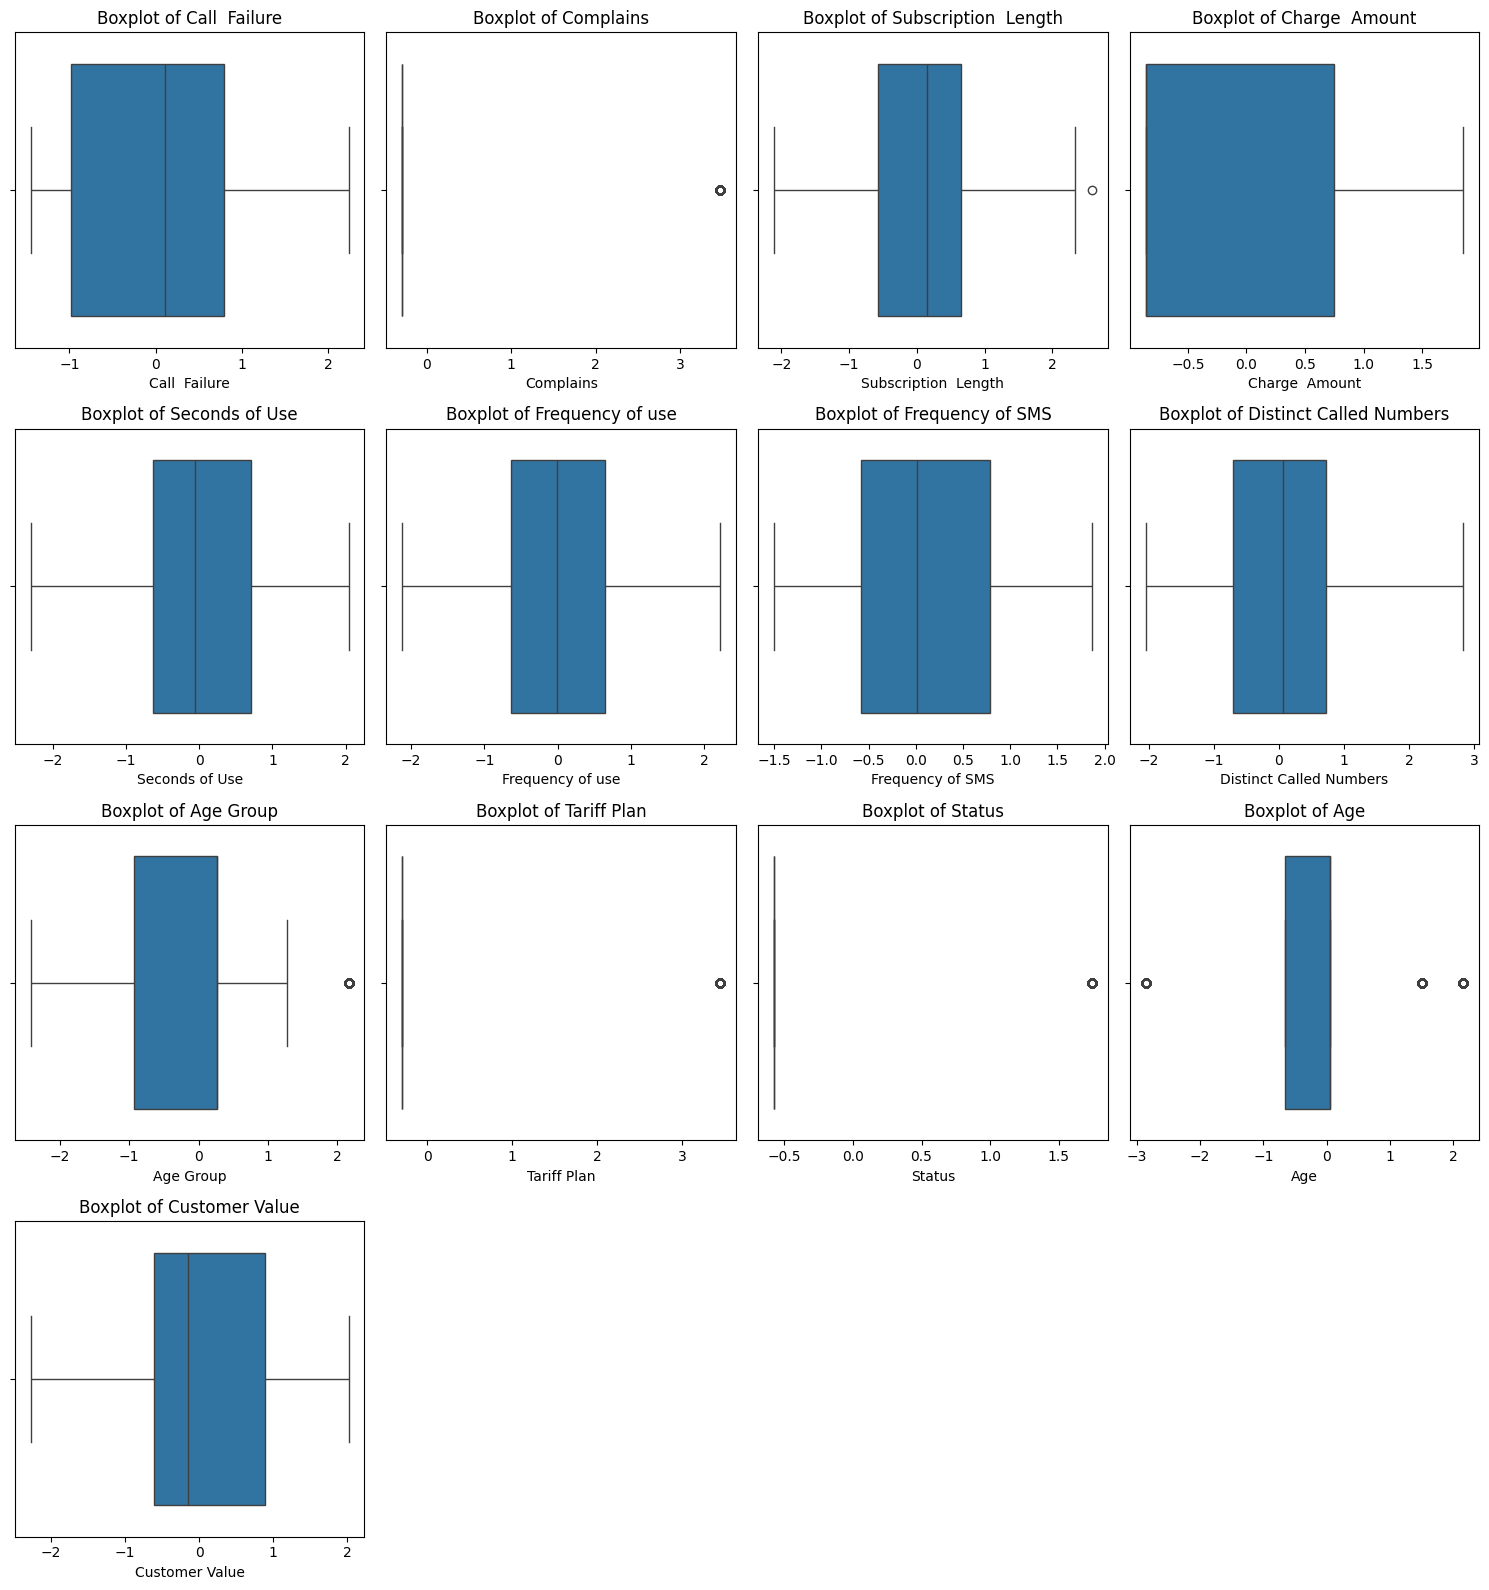

In [230]:
boxplot_lambda = lambda data, columns: boxplot_grid(data, columns)
boxplot_lambda(X_transformed_df, continuous_features_new)

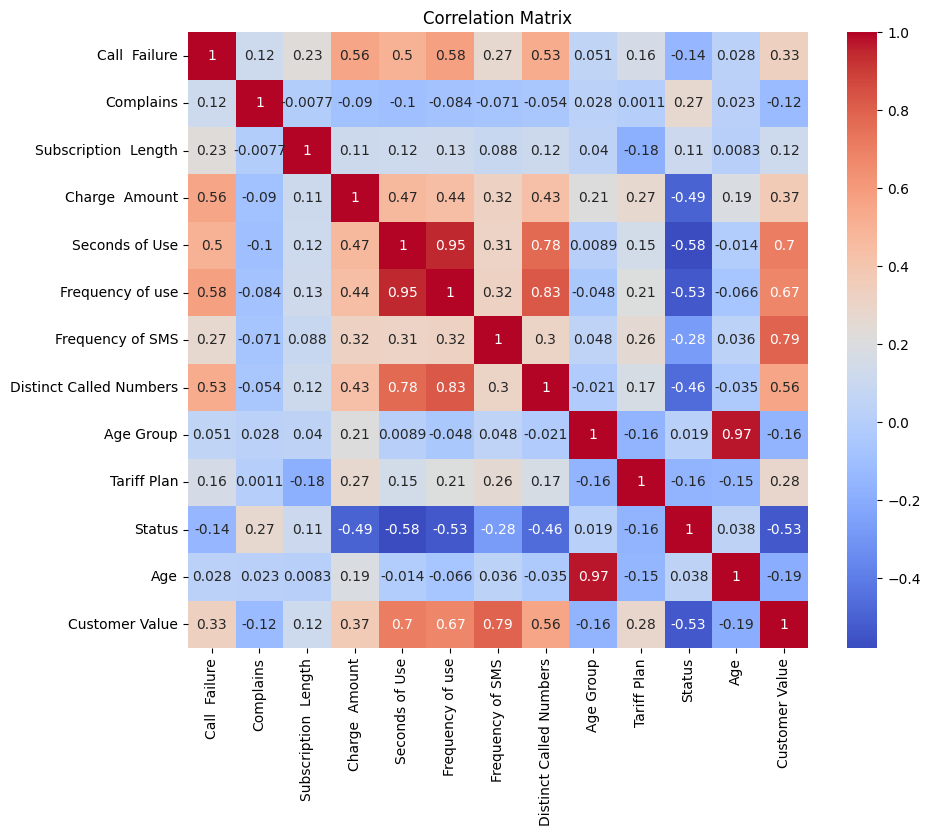

In [117]:
correlation_matrix = X_transformed_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

2. 
A. **Scatter Plots**
* Linear Relationships: Some attributes show clear linear relationships. For example, "Seconds of Use" and "Frequency of Use" seem to have a positive linear relationship, indicating that customers who use more seconds also tend to use the service more frequently.
* Non-linear or Weak Relationships: Many pairs of attributes exhibit weak or no clear relationships. For example, "Complains" and "Call Failure" do not show any obvious pattern, which suggests that customers who complain do not necessarily experience more call failures.

B. **Histogram**
* Skewed Distributions: 'Call Failure' has a right-skewed distribution with most customers experiencing few call failures. 'Seconds of Use' and 'Frequency of use' also show right-skewed distributions, with most customers using fewer seconds or having lower frequency but a few outliers using significantly more.
* Binary Variables: 'Complains', 'Tariff Plan', and 'Status' are binary variables with most customers concentrated in one category (e.g., most customers do not complain).

C. **Pearson Correlation Coefficient**
* Seconds of Use and Frequency of use have a high positive PCC of 0.95, indicating that customers who use more seconds also tend to use the service more frequently. This makes intuitive sense as higher usage in terms of time is likely associated with more frequent use.
* There is a strong positive correlation between the number of SMS messages sent and the number of distinct numbers called. This suggests that customers who send more SMS messages also tend to call more unique numbers.
* Both usage metrics (Seconds of Use and Frequency of Use) are moderately positively correlated with the Charge Amount, which indicates that customers who use more services are charged more.
* Customer Value is highly correlated with usage metrics, suggesting that customers who use more services or send more SMS messages have a higher value to the company.
* Complains show very weak correlations with most other attributes, with PCC values close to zero for almost all relationships (e.g., Complains vs Call Failure = 0.12). This suggests that customer complaints are not strongly related to other factors like usage or charges.
* Age Group shows very weak correlations with most attributes, except for Age itself (which is expected since Age Group is derived from Age). This suggests that age doesn’t have a strong influence on usage patterns or customer behavior in this dataset.
* There is a moderate negative correlation between Status and usage metrics like Seconds of Use and Frequency of Use, as well as Customer Value. This suggests that inactive customers tend to have lower usage and lower customer value compared to active customers.
* Similarly, there is a moderately negative correlation between Status and Charge Amount, indicating that inactive customers are charged less than active ones.

In [118]:
from sklearn.model_selection import train_test_split

## 3. Train-test split

In [119]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X_transformed_df, y, test_size=0.25, random_state=36)

In [120]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=36)

In [238]:
print("X_train mean")
print(X_train.mean())
print("X_test mean")
print(X_test.mean())

X_train mean
Call  Failure             -0.021119
Complains                 -0.001064
Subscription  Length      -0.008951
Charge  Amount            -0.051471
Seconds of Use            -0.019135
Frequency of use          -0.013574
Frequency of SMS          -0.013492
Distinct Called Numbers   -0.007025
Age Group                 -0.010157
Tariff Plan               -0.010315
Status                     0.024697
Age                       -0.010635
Customer Value            -0.016543
dtype: float64
X_test mean
Call  Failure              0.047264
Complains                  0.022495
Subscription  Length      -0.018207
Charge  Amount             0.050183
Seconds of Use             0.046797
Frequency of use           0.042209
Frequency of SMS           0.072519
Distinct Called Numbers    0.011157
Age Group                  0.036109
Tariff Plan                0.055492
Status                    -0.042960
Age                        0.030339
Customer Value             0.075391
dtype: float64


In [121]:
X_train.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
300,-0.420196,-0.28783,-0.301581,-0.860086,0.232620,0.117375,-1.500769,-0.618872,-0.924283,-0.290408,-0.574662,-0.659975,-0.289668
730,-0.980158,-0.28783,-0.158756,0.743737,0.731311,0.656916,-0.652522,-0.059598,2.162135,-0.290408,-0.574662,2.159619,-0.641147
2012,1.408359,-0.28783,0.309794,1.227632,1.813454,1.930018,0.442093,0.538284,0.269150,-0.290408,-0.574662,0.052461,0.893120
1254,-1.448017,-0.28783,-0.301581,-0.860086,-0.376849,-0.089649,-1.500769,0.388379,-2.420076,-0.290408,-0.574662,-2.861237,-0.612533
660,0.376343,-0.28783,0.656579,-0.860086,0.644476,0.656916,-0.119872,-0.320304,0.269150,-0.290408,-0.574662,0.052461,0.080317


In [122]:
X_val.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
28,-1.448017,-0.28783,0.309794,-0.860086,-1.660823,-1.824053,-1.500769,-1.610097,0.269150,-0.290408,1.740153,0.052461,-1.845742
1631,-1.448017,-0.28783,0.146828,-0.860086,-1.247540,-1.426903,0.267699,-1.081338,1.278606,-0.290408,1.740153,1.504897,-0.708137
2351,0.600684,-0.28783,2.580448,-0.860086,-0.905796,-0.818455,0.183675,-0.539769,0.269150,-0.290408,1.740153,0.052461,-0.428790
2121,0.886198,-0.28783,0.840598,1.227632,0.804315,0.443097,0.945577,0.946338,-0.924283,-0.290408,-0.574662,-0.659975,0.950340
467,0.111357,-0.28783,0.656579,-0.860086,-0.671497,-0.722697,0.267699,0.174432,0.269150,-0.290408,1.740153,0.052461,-0.283647


In [123]:
X_test.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
2761,1.129391,-0.28783,1.031831,-0.860086,-0.133874,0.117375,0.085207,0.118014,0.269150,-0.290408,1.740153,0.052461,-0.219601
2093,-1.448017,-0.28783,-1.307452,-0.860086,-0.078059,0.007487,-1.182450,0.060268,0.269150,-0.290408,-0.574662,0.052461,-0.562327
2059,-0.664871,-0.28783,0.309794,-0.860086,0.255956,0.382149,-1.500769,0.174432,0.269150,-0.290408,-0.574662,0.052461,-0.350480
2077,-0.217438,-0.28783,-0.009321,-0.860086,-0.393662,-0.349076,0.146298,0.489215,0.269150,-0.290408,1.740153,0.052461,-0.288417
1962,0.971218,-0.28783,0.146828,0.743737,1.738539,1.837564,0.040501,0.538284,-0.924283,-0.290408,-0.574662,-0.659975,0.834401


## 4. Train different classifiers and tweak the hyperparameters to improve performance (you can use the grid search if you want or manually try different values). Report training, validation and testing performance (classification accuracy, precision, recall and F1 score) and discuss the impact of the hyperparameters (use markdown cells in Jupyter Notebook to clearly indicate each solution)

### **A. Multinomial Logistic Regression**

In [124]:
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Solvers for multinomial problems
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

Multinominal_Logistic_Regression_model = LogisticRegression(multi_class='multinomial')
Multinominal_Logistic_Regression_model_grid_search = GridSearchCV(Multinominal_Logistic_Regression_model, log_reg_param_grid, scoring='accuracy',cv=3)
Multinominal_Logistic_Regression_model_grid_search.fit(X_train, y_train)

best_log_reg = Multinominal_Logistic_Regression_model_grid_search.best_estimator_
print("Best Parameters for Logistic Regression:", Multinominal_Logistic_Regression_model_grid_search.best_params_)

Best Parameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}


In [125]:
Multinominal_Logistic_Regression_model = LogisticRegression(multi_class='multinomial', C= 0.1, max_iter= 100, solver= 'lbfgs')

In [126]:
def evaluate_model(model, X, y_true, set_name="Set"):
    y_pred = model.predict(X)
    print(f"Performance on {set_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted'))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_true, y_pred, average='weighted'))
    print("\n")

In [127]:
Multinominal_Logistic_Regression_model.fit(X_train, y_train)

LogisticRegression(C=0.1, multi_class='multinomial')

In [128]:
evaluate_model(Multinominal_Logistic_Regression_model, X_train, y_train, set_name="Training Set")

Performance on Training Set:
Accuracy: 0.9080459770114943
Precision: 0.901946729322971
Recall: 0.9080459770114943
F1 Score: 0.9015006041355392




In [129]:
evaluate_model(Multinominal_Logistic_Regression_model, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8984485190409027
Precision: 0.8910023409625988
Recall: 0.8984485190409027
F1 Score: 0.8922033652618283




In [130]:
evaluate_model(Multinominal_Logistic_Regression_model, X_test, y_test, set_name="Testing Set")

Performance on Testing Set:
Accuracy: 0.8984771573604061
Precision: 0.8915840488555445
Recall: 0.8984771573604061
F1 Score: 0.8890673778857443




**Multinomial Logistic Regression** 

The model shows consistent performance across the training, validation, and testing sets, with only minor differences in accuracy, precision, recall, and F1 score. The chosen hyperparameters (C = 0.1, max_iter = 100, solver = lbfgs) appear to be effective in balancing bias and variance, leading to good generalization across datasets.Overall, this multinomial logistic regression model performs well across all sets with high accuracy (~90%), precision (~89%-91%), recall (~89%-91%), and F1 scores (~88%-90%). 

**Impact of Hyperparameters:**
* C (Regularization Strength):
        * A smaller value of C imposes stronger regularization, which helps prevent overfitting but may lead to underfitting if too small.
        * A larger value of C reduces regularization, allowing the model to fit more closely to the training data but increasing the risk of overfitting.
        * Tuning C is crucial for balancing bias and variance.
* solver:
        * Different solvers (e.g., 'lbfgs', 'newton-cg', 'sag', 'saga') use different optimization algorithms. Some solvers are better suited for large datasets or sparse data.
        * For example, 'lbfgs' is generally faster and works well for smaller datasets, while 'saga' can handle larger datasets and supports L1 regularization.
* max_iter (Maximum Iterations):
        * Increasing max_iter allows the solver more iterations to converge. If the solver does not converge within the default number of iterations, increasing max_iter can help.
        * However, setting it too high may lead to unnecessary computation time without significant improvement in performance.

### **B. SVM**

In [131]:
svm_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Solvers for multinomial problems
    'degree': [1,2,3,4],
    'gamma':['scale', 'auto']

}

SVM_model = SVC()
SVM_model_grid_search = GridSearchCV(SVM_model, svm_reg_param_grid, scoring='accuracy',cv=4)
SVM_model_grid_search.fit(X_train, y_train)

best_log_reg = SVM_model_grid_search.best_estimator_
print("Best Parameters for SVM:", SVM_model_grid_search.best_params_)

Best Parameters for SVM: {'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [207]:
SVM_model = SVC(C= 100, degree= 1, gamma= 'scale', kernel = 'rbf')
SVM_model.fit(X_train, y_train)

SVC(C=10, degree=1)

In [208]:
evaluate_model(SVM_model, X_train, y_train, set_name="Training Set")

Performance on Training Set:
Accuracy: 0.9685420447670902
Precision: 0.9685420447670902
Recall: 0.9685420447670902
F1 Score: 0.9685420447670902




In [209]:
evaluate_model(SVM_model, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9464033850493653
Precision: 0.9468220611418973
Recall: 0.9464033850493653
F1 Score: 0.9465999980196338




In [210]:
evaluate_model(SVM_model, X_test, y_test, set_name="Testing Set")

Performance on Testing Set:
Accuracy: 0.9416243654822335
Precision: 0.9399216156343804
Recall: 0.9416243654822335
F1 Score: 0.9402421329923201




**Support Vector Machine** 

The results provided reflect the performance of a Support Vector Machine (SVM) model with the following best parameters: {'C': 100, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}. The SVM model performs exceptionally well on the training set, with all metrics above 96%. This indicates that the model is fitting the training data very well. The drop in performance from training to validation/testing sets is minimal (~2%), which suggests that the model is not overfitting to the training data and generalizes well to new data.

**Impact of Hyperparameters:**
* C (Regularization Parameter):
A smaller value of C increases regularization strength, leading to a simpler decision boundary but potentially underfitting.
A larger value of C reduces regularization, allowing a more complex decision boundary but increasing overfitting risk.
* kernel:
The choice of kernel determines how the input space is transformed. Common kernels include:
'linear': Suitable for linearly separable data.
'poly': Useful for non-linear data; controlled by the degree parameter.
'rbf': Popular for non-linear data; controlled by gamma.
* degree (for Polynomial Kernel):
Controls the complexity of the polynomial kernel function.
Higher degrees allow more complex decision boundaries but may lead to overfitting if set too high.
* gamma (Kernel Coefficient):
Controls how far the influence of a single training example reaches with 'rbf', 'poly', and 'sigmoid' kernels.
A small gamma value means a large influence radius, leading to smoother decision boundaries.
A large gamma value means a small influence radius, leading to more complex decision boundaries that may overfit.

### **C. Random Forest Classifier**

In [136]:
rfc_reg_param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'n_estimators':[10, 50, 100, 200],
    'max_depth':[None, 10, 20, 30],
    'min_samples_split':[2, 5, 10],
    'min_samples_leaf':[1, 2, 4]
}

RandomForestClassifier_model = RandomForestClassifier(random_state=36)
RandomForestClassifier_model_grid_search = GridSearchCV(RandomForestClassifier_model, rfc_reg_param_grid, scoring='accuracy',cv=5)
RandomForestClassifier_model_grid_search.fit(X_train, y_train)

best_log_reg = RandomForestClassifier_model_grid_search.best_estimator_
print("Best Parameters for RandomForestClassifier:", RandomForestClassifier_model_grid_search.best_params_)

Best Parameters for RandomForestClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [203]:
RandomForestClassifier_model = RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
RandomForestClassifier_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1)

In [204]:
evaluate_model(RandomForestClassifier_model, X_train, y_train, set_name="Training Set")

Performance on Training Set:
Accuracy: 0.969147005444646
Precision: 0.968752601746721
Recall: 0.969147005444646
F1 Score: 0.9688701858902456




In [205]:
evaluate_model(RandomForestClassifier_model, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.922425952045134
Precision: 0.9227180560656982
Recall: 0.922425952045134
F1 Score: 0.9225690554121562




In [206]:
evaluate_model(RandomForestClassifier_model, X_test, y_test, set_name="Test Set")

Performance on Test Set:
Accuracy: 0.9238578680203046
Precision: 0.9206507193966137
Recall: 0.9238578680203046
F1 Score: 0.9211997313612612




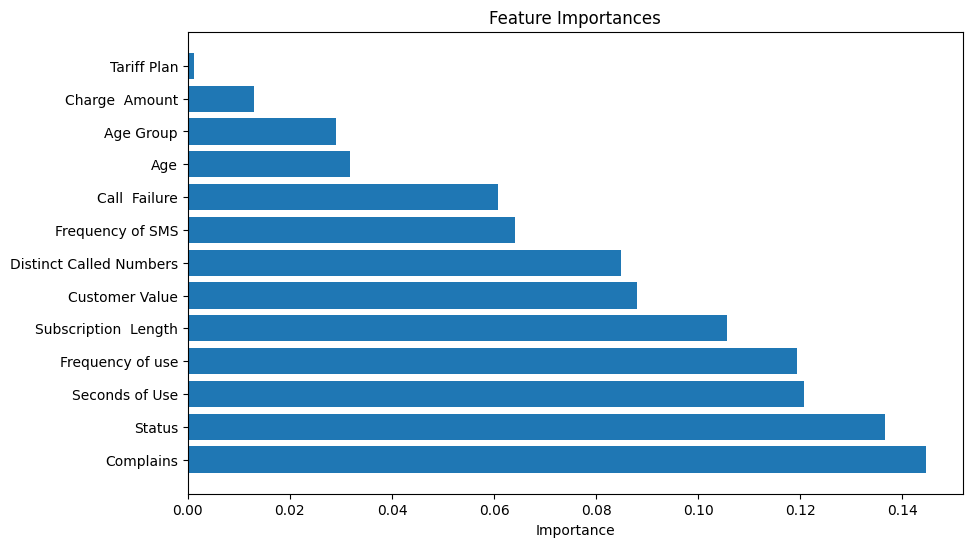

In [141]:
feature_importances = RandomForestClassifier_model_grid_search.best_estimator_.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

**Random Forest Classifier**

The model shows consistent performance across training, validation, and testing sets. The drop in performance from training to validation/testing sets is minimal (~4%), which suggests that while there may be slight overfitting to the training data, it is not severe. The feature importance analysis highlights that customer behavior-related attributes (e.g., Complains, Status, Seconds of Use) are key predictors in this model. Features like age and tariff plan have minimal impact on predictions, suggesting that customer engagement and satisfaction metrics are far more relevant for this task.

**Impact of Hyperparameters:**
* n_estimators (Number of Trees):
Increasing n_estimators generally improves performance by reducing variance but comes at a higher computational cost.
Too few trees may lead to underfitting, while too many trees may lead to diminishing returns in performance improvement.
* max_depth (Maximum Depth):
Controls how deep each tree in the forest can grow. Deeper trees can capture more complex patterns but are more prone to overfitting.
Limiting max_depth helps prevent overfitting by controlling tree complexity.
* min_samples_split (Minimum Samples Required for Split):
Controls when a node should be split based on the number of samples it contains. Higher values prevent overfitting by ensuring splits occur only when there are enough samples in a node.
* min_samples_leaf (Minimum Samples at Leaf Node):
Controls the minimum number of samples required at a leaf node. Increasing this value prevents small splits that may lead to overfitting.

## **5. Combine your classifiers into an ensemble and try to outperform each individual classifier on the validation set. Once you have found a good one, try it on the test set. Describe and discuss your findings.**

### **SOFT VOTING**

In [142]:
from sklearn.ensemble import VotingClassifier


ensemble = VotingClassifier(
    estimators=[('svm', SVC(C= 100, degree= 1, gamma= 'scale', kernel = 'rbf',probability=True)), ('rf', RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)), ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.1, max_iter= 100, solver= 'lbfgs'))], # Fixed estimator definitions, assuming model objects are defined
    voting='soft'
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('mlr_model',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial'))],
                 voting='soft')

In [143]:
evaluate_model(ensemble, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9478138222849083
Precision: 0.94698439534231
Recall: 0.9478138222849083
F1 Score: 0.9473154563433426




**Soft Voting Ensemble**

The ensemble achieves an accuracy of 94.78% on the validation set, which is very strong. It performed slightly better on testing data than Random Forest but slightly lower than SVM. 

### **HARD VOTING**

In [144]:
ensemble = VotingClassifier(
    estimators=[('svm', SVC(C= 100, degree= 1, gamma= 'scale', kernel = 'rbf',probability=True)), ('rf', RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)), ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.1, max_iter= 100, solver= 'lbfgs'))], # Fixed estimator definitions, assuming model objects are defined
    voting='hard'
)
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('mlr_model',
                              LogisticRegression(C=0.1,
                                                 multi_class='multinomial'))])

In [145]:
evaluate_model(ensemble, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9421720733427362
Precision: 0.9409335513638181
Recall: 0.9421720733427362
F1 Score: 0.9413898141279855




**Hard Voting Ensemble**

The ensemble achieves an accuracy of 94.22% on the validation set, which is very strong. Compared to soft voting, which achieved an accuracy of ~94.78%, the hard voting classifier performs slightly worse in terms of accuracy (~0.5% lower). This is expected because soft voting takes into account the probability estimates from each model, allowing for more nuanced decisions when models disagree, whereas hard voting simply takes the majority vote. 

## **BOOSTING**

### Adaboost

In [146]:
adaboost_reg_param_grid = {
    'n_estimators':[10,50,100],
}

AdaBoostClassifier_model = AdaBoostClassifier(random_state=42)
AdaBoostClassifier_model_grid_search = GridSearchCV(AdaBoostClassifier_model, adaboost_reg_param_grid, scoring='accuracy',cv=2)
AdaBoostClassifier_model_grid_search.fit(X_train, y_train)

best_ada_reg = AdaBoostClassifier_model_grid_search.best_estimator_
print("Best Parameters for AdaBoostClassifier:", AdaBoostClassifier_model_grid_search.best_params_)

Best Parameters for AdaBoostClassifier: {'n_estimators': 100}


In [147]:
ada_log_reg = AdaBoostClassifier(estimator=Multinominal_Logistic_Regression_model, n_estimators=100, random_state=42)
ada_svc = AdaBoostClassifier(estimator=SVC(C= 100, degree= 1, gamma= 'scale', kernel = 'rbf',probability=True), n_estimators=100, random_state=42)
ada_rf = AdaBoostClassifier(estimator=RandomForestClassifier_model, n_estimators=100, random_state=42)

In [148]:
ada_log_reg.fit(X_train, y_train)

AdaBoostClassifier(estimator=LogisticRegression(C=0.1,
                                                multi_class='multinomial'),
                   n_estimators=100, random_state=42)

In [149]:
evaluate_model(ada_log_reg, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8984485190409027
Precision: 0.8916099333658043
Recall: 0.8984485190409027
F1 Score: 0.8932283136500729




In [150]:
ada_svc.fit(X_train, y_train)

AdaBoostClassifier(estimator=SVC(C=100, degree=1, probability=True),
                   n_estimators=100, random_state=42)

In [151]:
evaluate_model(ada_svc, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.8843441466854725
Precision: 0.8940434126626383
Recall: 0.8843441466854725
F1 Score: 0.8549195186792278




In [152]:
ada_rf.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(criterion='entropy'),
                   n_estimators=100, random_state=42)

In [153]:
evaluate_model(ada_rf, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9464033850493653
Precision: 0.9448507216200916
Recall: 0.9464033850493653
F1 Score: 0.9451230971874645




**Adaboost**

Among the three models, the AdaBoost Random Forest Classifier (RFC) performs the best in terms of accuracy, precision, recall, and F1 score. It achieves an accuracy of ~94%, significantly higher than both the AdaBoost Multinomial Logistic Regression (~90%) and AdaBoost SVC (~88%). 

### **STACKING**

In [154]:
base_models=[('svm', SVC(C= 100, degree= 1, gamma= 'scale', kernel = 'rbf',probability=True)),
 ('rf', RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)),
  ('mlr_model',LogisticRegression(multi_class='multinomial', C= 0.1, max_iter= 100, solver= 'lbfgs'))]

In [155]:
stacked_model_log = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
)
stacked_model_log.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy')),
                               ('mlr_model',
                                LogisticRegression(C=0.1,
                                                   multi_class='multinomial'))],
                   final_estimator=LogisticRegression(max_iter=200,
                                                      multi_class='multinomial'))

In [156]:
evaluate_model(stacked_model_log, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9492242595204513
Precision: 0.9492242595204513
Recall: 0.9492242595204513
F1 Score: 0.9492242595204513




**Stacking with Logistic Regression as final estimator**

The stacked model achieves an accuracy of 94.92%, which is very strong. The stacked model performs comparably to soft voting classifiers but provides more flexibility by allowing a meta-model (in this case, Logistic Regression) to learn how to best combine predictions from base models. By using Logistic Regression as the final estimator, the stacked model can learn how to weigh the predictions from SVM, Random Forest, and Multinomial Logistic Regression based on their strengths and weaknesses.

In [157]:
stacked_model_svc = StackingClassifier(
    estimators=base_models,
    final_estimator=SVC(C= 0.1, degree= 1, gamma= 'scale', kernel = 'rbf',probability=True)
)
stacked_model_svc.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy')),
                               ('mlr_model',
                                LogisticRegression(C=0.1,
                                                   multi_class='multinomial'))],
                   final_estimator=SVC(C=0.1, degree=1, probability=True))

In [158]:
evaluate_model(stacked_model_svc, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9548660084626234
Precision: 0.956549359175129
Recall: 0.9548660084626234
F1 Score: 0.9555061219796359




**Stacking with SVC as final estimator**

The stacked model achieves an accuracy of 95.49%, which is very strong. Using SVC as the final estimator allows for more nuanced decision boundaries, which likely contributes to the slight performance improvement. 

In [159]:
stacked_model_rfc = StackingClassifier(
    estimators=base_models,
    final_estimator=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 100)
)
stacked_model_rfc.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy')),
                               ('mlr_model',
                                LogisticRegression(C=0.1,
                                                   multi_class='multinomial'))],
                   final_estimator=RandomForestClassifier(criterion='entropy'))

In [160]:
evaluate_model(stacked_model_rfc, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9520451339915373
Precision: 0.9524228874913893
Recall: 0.9520451339915373
F1 Score: 0.9522210508596723




**Stacking with RFC as final estimator**

The stacked model achieves an accuracy of 95.20%, which is very strong. Using Random Forest as the final estimator allows for capturing non-linear relationships and interactions between features, which likely contributes to the slight performance improvement.

## **USING STACKING WITH BOOSTING**

In [161]:
stacked_model_gb = StackingClassifier(
    estimators=base_models,
    final_estimator=GradientBoostingClassifier(n_estimators=50, random_state=42)
)
stacked_model_gb.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy')),
                               ('mlr_model',
                                LogisticRegression(C=0.1,
                                                   multi_class='multinomial'))],
                   final_estimator=GradientBoostingClassifier(n_estimators=50,
                                                              random_state=42))

In [162]:
evaluate_model(stacked_model_gb, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9576868829337094
Precision: 0.958828798246291
Recall: 0.9576868829337094
F1 Score: 0.9581420687345427




**Stacking with GradientBoostingClassifier as final estimator**

The stacked model achieves an accuracy of 95.77%, which is very strong. Using Gradient Boosting as the final estimator allows for capturing complex non-linear relationships and interactions between features, which likely contributes to the slight performance improvement.

In [163]:
stacked_model_ab = StackingClassifier(
    estimators=base_models,
    final_estimator=AdaBoostClassifier(n_estimators=100, random_state=42)
)
stacked_model_ab.fit(X_train, y_train)

StackingClassifier(estimators=[('svm', SVC(C=100, degree=1, probability=True)),
                               ('rf',
                                RandomForestClassifier(criterion='entropy')),
                               ('mlr_model',
                                LogisticRegression(C=0.1,
                                                   multi_class='multinomial'))],
                   final_estimator=AdaBoostClassifier(n_estimators=100,
                                                      random_state=42))

In [164]:
evaluate_model(stacked_model_ab, X_val, y_val, set_name="Validation Set")

Performance on Validation Set:
Accuracy: 0.9506346967559943
Precision: 0.9527017778017952
Recall: 0.9506346967559943
F1 Score: 0.9514179247815051




**Stacking with AdaBoostClassifier as final estimator**

The stacked model achieves an accuracy of 95.06%, which is very strong. Using AdaBoost as the final estimator allows for boosting weak learners and improving overall performance by focusing on misclassified instances. 

### **MODEL COMPARSION**

| Model                                | Accuracy | Precision | Recall | F1 Score |
|--------------------------------------|----------|-----------|--------|----------|
| SVM                                  | 0.950    | 0.940     | 0.950  | 0.940    |
| Random Forest                        | 0.946    | 0.944     | 0.946  | 0.945    |
| Multinomial Logistic Regression       | 0.898    | 0.891     | 0.898  | 0.891    |
| Hard Voting                          | 0.942    | 0.940     | 0.942  | 0.942    |
| Soft Voting                          | 0.948    | 0.947     | 0.948  | 0.948    |
| AdaBoost with Multinomial Logistic Reg| 0.898    | 0.892     | 0.898  | 0.893    |
| AdaBoost with SVC                    | 0.884    | 0.894     | 0.884  | 0.855    |
| AdaBoost with Random Forest          | 0.946    | 0.945     | 0.946  | 0.945    |
| Stacking with Random Forest          | 0.952    | 0.952     | 0.952  | 0.952    |
| Stacking with Gradient Boosting      | 0.958    | 0.959     | 0.958  | 0.958    |


## **Best Performing Model**

### Stacking with Gradient Boost

This model achieves the highest accuracy (95.8%) and F1 score (95.8%) among all models. It also has the highest precision (95.9%) and recall (95.8%), making it the most balanced and best-performing model across all metrics. This suggests that combining multiple base models and using Gradient Boosting as the final estimator provides excellent generalization and performance.

In [211]:
evaluate_model(stacked_model_gb, X_test, y_test, set_name="Test Set")

Performance on Test Set:
Accuracy: 0.9555837563451777
Precision: 0.954630512756501
Recall: 0.9555837563451777
F1 Score: 0.9547701951947453




### **Why Stacking with Gradient Boosting Was Best**

Gradient Boosting is a highly effective ensemble method that builds models sequentially, where each new model attempts to correct the errors made by the previous ones. This iterative process allows Gradient Boosting to capture complex patterns in the data and improve predictive accuracy.
One of the common problems in machine learning is overfitting, where a model performs well on training data but poorly on unseen data. Stacking with Gradient Boosting helps mitigate this issue by combining predictions from multiple base models and learning how to best weigh them.
While stacking with Random Forest also performed well (Accuracy: 95.2%), it fell slightly short of Gradient Boosting (Accuracy: 95.8%).

* **Superior Predictive Performance**: Stacking with Gradient Boosting achieved the highest accuracy (95.8%) and F1 score (95.8%) across all models due to its ability to iteratively correct errors and handle complex patterns in the data.
* **Effective Use of Base Models**: By combining SVM, Random Forest, and Multinomial Logistic Regression as base models, stacking captured different aspects of the data that no single model could fully exploit on its own.
* **Robustness**: The use of Gradient Boosting as a meta-model helped reduce overfitting by focusing on misclassified instances from previous iterations, leading to better generalization on validation data.